In [1]:
#Call required libraries
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
import matplotlib.dates as md

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import os                     # For os related operations
import sys                    # For data size
import matplotlib.cm as cm

In [2]:
df = pd.read_csv("China (6-19 April).csv")
df.describe()

FileNotFoundError: File b'China (6-19 April).csv' does not exist

In [ ]:
df.dtypes

In [ ]:
df1 = df[['Value']] #Subsetting the data
cor = df1.corr() #Calculate the correlation of the above variables

In [5]:
#Scaling of data
ss = StandardScaler()
ss.fit_transform(df1)

array([[-0.7654976 ],
       [-0.7654976 ],
       [-0.7654976 ],
       ..., 
       [-0.60162439],
       [-0.60162439],
       [-0.60162439]])

In [6]:
#(1) k-means clustering
def doKmeans(X, nclust=5):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(df1, 2)
kmeans = pd.DataFrame(clust_labels)
df1.insert((df1.shape[1]),'kmeans',kmeans)

In [7]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.set_title('K-Means Clustering',fontsize=24)
c=kmeans[0]
c.describe()

count    4032.000000
mean        0.660714
std         0.473526
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: 0, dtype: float64

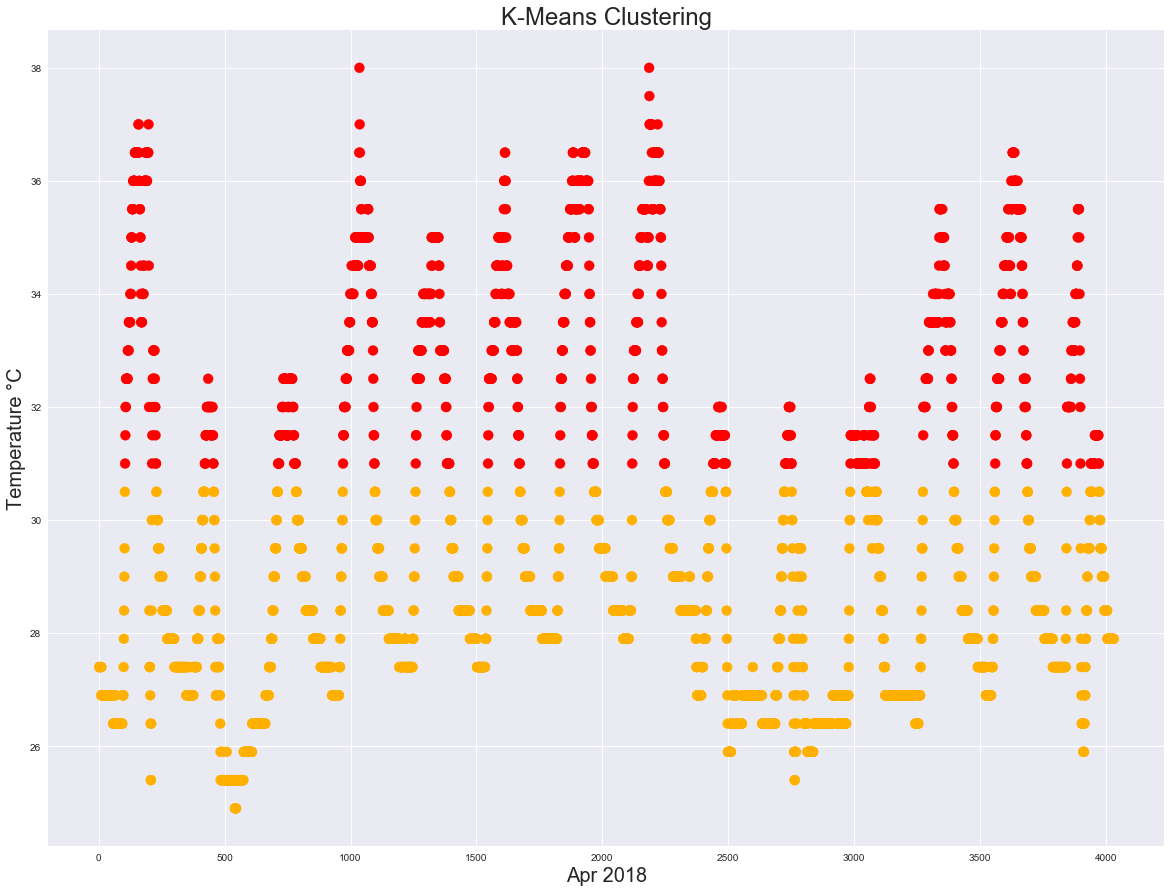

In [8]:
#scatter = ax.scatter(df['Number'],df1['Value'],c=kmeans[0],cmap=cmap,s=100,vmin=0, vmax=50)
scatter = ax.scatter(df['Number'],df1['Value'],c=kmeans[0],cmap=plt.cm.prism,s=100,vmin=0, vmax=50)
plt.ylabel('Temperature °C',fontsize=20)
plt.xlabel('Apr 2018',fontsize=20)
plt.show(scatter)

In [8]:
#**************(2) Agglomerative Clustering********************#

In [9]:
#Call required libraries
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
import matplotlib.dates as md

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import os                     # For os related operations
import sys                    # For data size

In [2]:
df = pd.read_csv("TasteGarden_Dec2017.csv")

In [8]:
df1 = df[['Value']] #Subsetting the data
cor = df1.corr()

,Value
0,11.6
1,11.1
2,12.8
3,11.1
4,11.5
5,11.1
6,10.2
7,11.4
8,13.8
9,10.9


In [4]:
ss = StandardScaler()
ss.fit_transform(df1)

array([[ 1.94019131],
       [ 1.68266864],
       [ 2.55824572],
       ..., 
       [-0.53202633],
       [-0.6350354 ],
       [-0.68653994]])

In [7]:
#(2) Agglomerative Clustering
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

clust_labels1 = doAgglomerative(df1, 2)
agglomerative = pd.DataFrame(clust_labels1)
wh1.insert((df1.shape[1]),'agglomerative',agglomerative)

ValueError: n_clusters should be an integer greater than 0. 0 was provided.

In [11]:
#Plot the clusters obtained using Agglomerative clustering or Hierarchical clustering
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df1['Number'],df1['Value'],
                     c=agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
plt.colorbar(scatter)

KeyError: 'Number'

In [ ]:
#(3) Affinity Propagation
def doAffinity(X):
    model = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
    model.fit(X)
    clust_labels2 = model.predict(X)
    cent2 = model.cluster_centers_
    return (clust_labels2, cent2)

clust_labels2, cent2 = doAffinity(wh1)
affinity = pd.DataFrame(clust_labels2)
wh1.insert((wh1.shape[1]),'affinity',affinity)

In [ ]:
#Plotting the cluster obtained using Affinity algorithm
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Trust..Government.Corruption.'],
                     c=affinity[0],s=50)
ax.set_title('Affinity Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

In [ ]:
#(4) Guassian Mixture Modelling
def doGMM(X, nclust=2):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(X)
    clust_labels3 = model.predict(X)
    return (clust_labels3)

clust_labels3 = doGMM(wh1,2)
gmm = pd.DataFrame(clust_labels3)
wh1.insert((wh1.shape[1]),'gmm',gmm)

In [ ]:
#Plotting the cluster obtained using GMM
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Trust..Government.Corruption.'],
                     c=gmm[0],s=50)
ax.set_title('Affinity Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

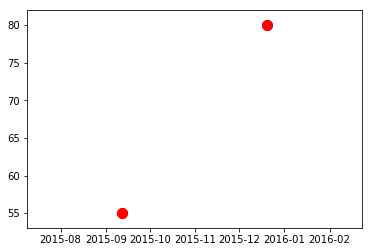

In [3]:
import pandas as pd
import matplotlib.pyplot as plt  

dates = ['2015-12-20','2015-09-12']  
PM_25 = [80, 55]
dates = [pd.to_datetime(d) for d in dates]

plt.scatter(dates, PM_25, s =100, c = 'red')
plt.show()